In [36]:
# Dataload
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


def bedtime_to_minutes_24h(time_str):
    hours, minutes = map(int, time_str.split(':'))
    if 0 <= hours < 6:
        return (hours + 24) * 60 + minutes  # Next day
    else:
        return hours * 60 + minutes  # Same day

# Function to convert regular time to minutes
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# Function to convert minutes back to time format
def minutes_to_time_24h(minutes):
    hours = int(minutes // 60) % 24
    mins = int(minutes % 60)
    return f"{hours:02d}:{mins:02d}"
    
    
df = pd.read_csv('./sleep_data.csv')

display(df)


,Country,Sleep Quality,Sleep Duration (hrs),Snore Duration,Bedtime,Wake-up Time,Daylight Savings,Snore percentage,Hemisphere,Approximate Latitude,Position Relative to Equator,Longest Night (hrs),Equinox Night(hrs),Longest night / equinox night,bedtime_minutes,wakeup_minutes
0,Ecuador,0.7426,7.3087,3.1281,23:29,06:46,0.0,42.80,Both,0°,On Equator,12.10,12.00,1.008333,1409,406
1,Indonesia,0.7460,7.3429,3.7532,23:47,07:08,0.0,51.11,Both,0°,Straddles Equator,22.50,12.00,1.875000,1427,428
2,Singapore,0.7272,7.1064,5.4312,00:34,07:40,0.0,76.43,Northern,1°N,Very Close to Equator,12.20,12.00,1.016667,1474,460
3,Costa Rica,0.7374,7.3553,4.3181,23:14,06:34,0.0,58.71,Northern,10°N,Low-Northern,12.20,12.00,1.016667,1394,394
4,Peru,0.6956,6.9546,2.5487,23:43,06:40,0.0,36.65,Southern,10°S,Low-Southern,12.50,12.00,1.041667,1423,400
5,Brazil,0.7321,7.2515,3.3342,23:53,07:08,0.0,45.98,Southern,10°S,Low-Southern,12.50,12.00,1.041667,1433,428
6,Philippines,0.7180,7.1500,5.0940,23:51,07:03,0.0,71.24,Northern,13°N,Low-Northern,12.50,12.00,1.041667,1431,423
7,Thailand,0.7382,7.2537,4.0320,00:22,07:36,0.0,55.59,Northern,15°N,Low-Northern,12.50,12.00,1.041667,1462,456
8,Vietnam,0.7120,7.0359,3.3892,00:03,07:04,0.0,48.17,Northern,16°N,Low-Northern,12.50,12.00,1.041667,1443,424
9,Malaysia,0.7093,6.9809,4.7327,00:30,07:29,0.0,67.79,Northern,2°N,Very Close to Equator,12.20,12.00,1.016667,1470,449


# Correlation Matrix for whole data

                Sleep Quality  Sleep Duration  Snore Duration   Bedtime  \
Sleep Quality        1.000000        0.971600        0.235786 -0.388892   
Sleep Duration       0.971600        1.000000        0.234335 -0.388732   
Snore Duration       0.235786        0.234335        1.000000  0.129225   
Bedtime             -0.388892       -0.388732        0.129225  1.000000   
Wake-Up Time         0.255890        0.278656        0.289909  0.775980   

                Wake-Up Time  
Sleep Quality       0.255890  
Sleep Duration      0.278656  
Snore Duration      0.289909  
Bedtime             0.775980  
Wake-Up Time        1.000000  


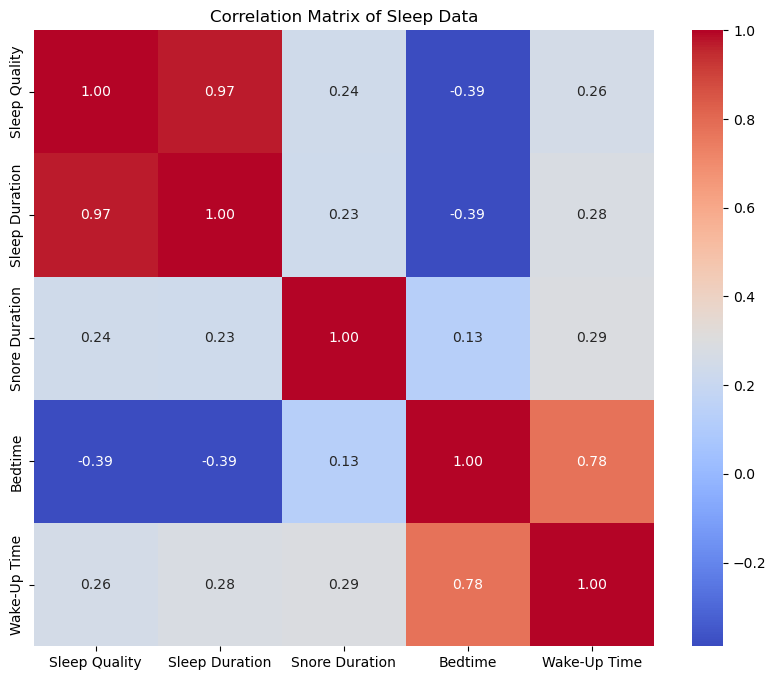

In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# display(df2)
# 4. Compute correlation matrix
corr_columns = ['Sleep Quality', 'Sleep Duration (hrs)','Snore Duration', 'bedtime_minutes', 'wakeup_minutes']
correlation_matrix = df[corr_columns].rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time', \
                       'Sleep Duration (hrs)' : 'Sleep Duration'}).corr()

print(correlation_matrix)

# 5. Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sleep Data')

plt.show()


# Correaltion Matrix for DST = True

                Sleep Quality  Sleep Duration  Snore Duration   Bedtime  \
Sleep Quality        1.000000        0.935892        0.417307 -0.721639   
Sleep Duration       0.935892        1.000000        0.475652 -0.624401   
Snore Duration       0.417307        0.475652        1.000000 -0.258741   
Bedtime             -0.721639       -0.624401       -0.258741  1.000000   
Wake-Up Time        -0.342634       -0.176230       -0.041114  0.878275   

                Wake-Up Time  
Sleep Quality      -0.342634  
Sleep Duration     -0.176230  
Snore Duration     -0.041114  
Bedtime             0.878275  
Wake-Up Time        1.000000  


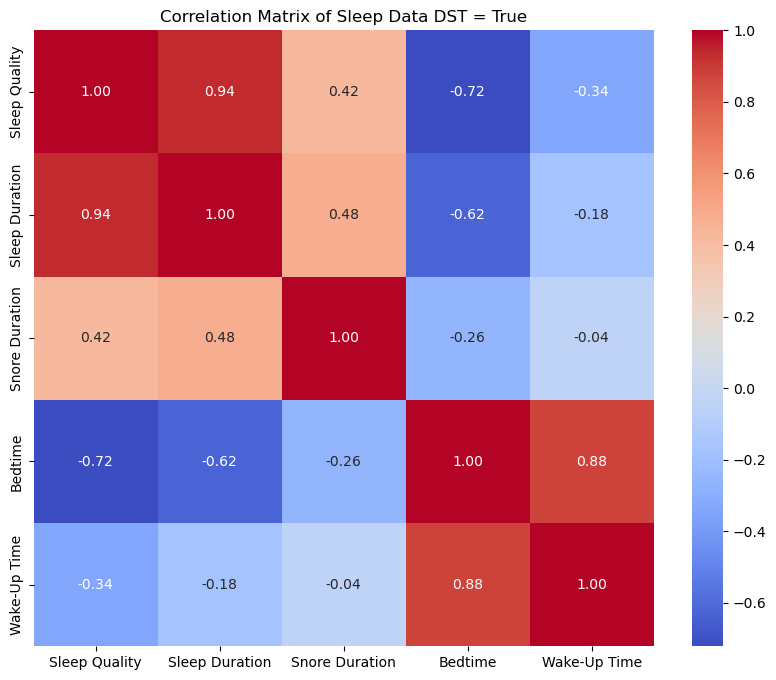

In [4]:
df_ds_true = df[df['Daylight Savings'] == 1]


# 4. Compute correlation matrix
corr_columns = ['Sleep Quality', 'Sleep Duration (hrs)','Snore Duration', 'bedtime_minutes', 'wakeup_minutes']
corr_matrix_ds_true = df_ds_true[corr_columns].rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time', \
                       'Sleep Duration (hrs)' : 'Sleep Duration'}).corr()

print(corr_matrix_ds_true)

# 5. Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_ds_true, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sleep Data DST = True')

plt.show()


# Correlation Matrix for DST = False

                Sleep Quality  Sleep Duration  Snore Duration   Bedtime  \
Sleep Quality        1.000000        0.952079       -0.102706 -0.237663   
Sleep Duration       0.952079        1.000000       -0.139309 -0.382930   
Snore Duration      -0.102706       -0.139309        1.000000  0.381201   
Bedtime             -0.237663       -0.382930        0.381201  1.000000   
Wake-Up Time         0.146438        0.011534        0.350589  0.918797   

                Wake-Up Time  
Sleep Quality       0.146438  
Sleep Duration      0.011534  
Snore Duration      0.350589  
Bedtime             0.918797  
Wake-Up Time        1.000000  


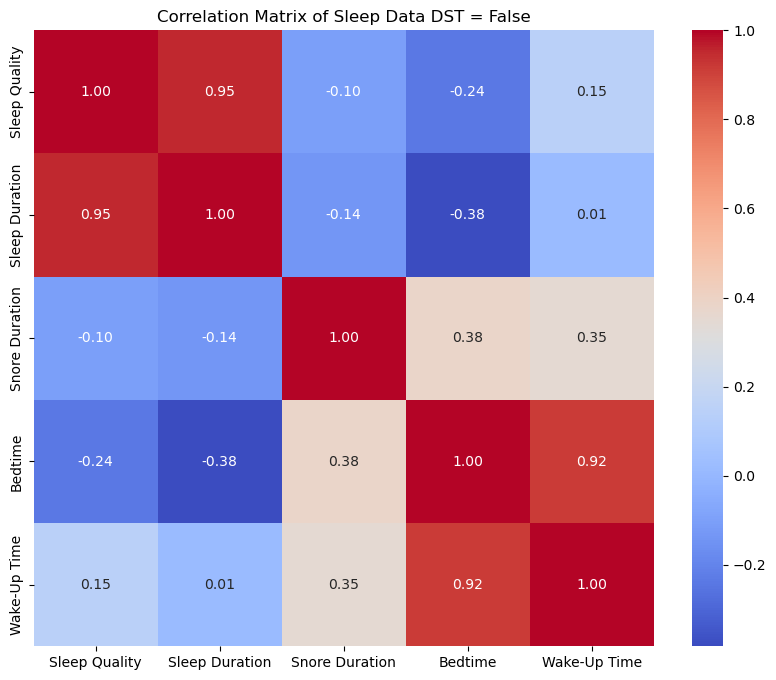

In [5]:
df_ds_false = df[df['Daylight Savings'] == 0]


# 4. Compute correlation matrix
corr_columns = ['Sleep Quality', 'Sleep Duration (hrs)','Snore Duration', 'bedtime_minutes', 'wakeup_minutes']
corr_matrix_ds_false = df_ds_false[corr_columns].rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time', \
                       'Sleep Duration (hrs)' : 'Sleep Duration'}).corr()

print(corr_matrix_ds_false)

# 5. Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_ds_false, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sleep Data DST = False')

plt.show()


# Correlation Matrix for Northern Hemisphere and Equator

                Sleep Quality  Sleep Duration  Snore Duration   Bedtime  \
Sleep Quality        1.000000        0.968477        0.162257 -0.373152   
Sleep Duration       0.968477        1.000000        0.176970 -0.347923   
Snore Duration       0.162257        0.176970        1.000000  0.140510   
Bedtime             -0.373152       -0.347923        0.140510  1.000000   
Wake-Up Time         0.284115        0.334350        0.257967  0.766654   

                Wake-Up Time  
Sleep Quality       0.284115  
Sleep Duration      0.334350  
Snore Duration      0.257967  
Bedtime             0.766654  
Wake-Up Time        1.000000  


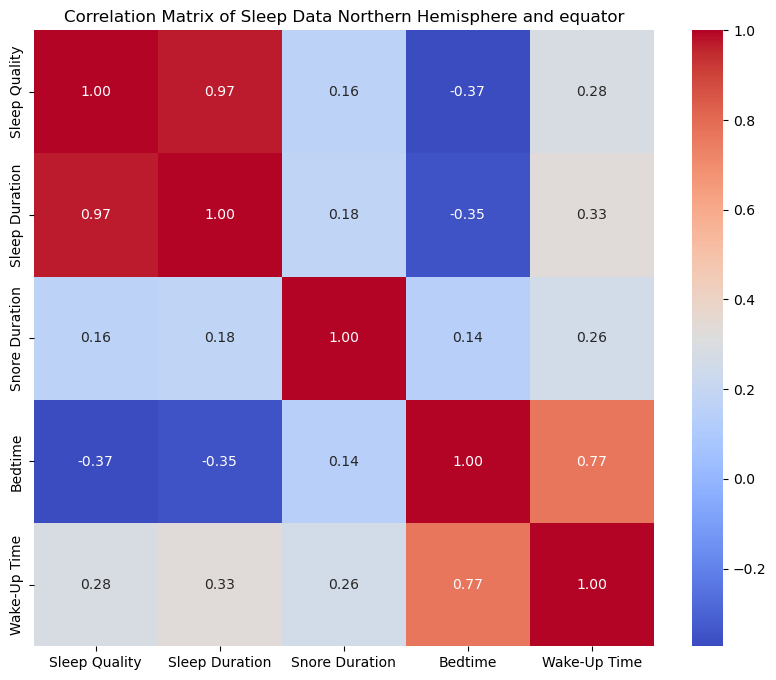

In [6]:
df_northern = df[(df['Hemisphere'] == 'Northern') | (df['Hemisphere'] == 'Both')]

# 4. Compute correlation matrix
corr_columns = ['Sleep Quality', 'Sleep Duration (hrs)','Snore Duration', 'bedtime_minutes', 'wakeup_minutes']
corr_matrix_northern = df_northern[corr_columns].rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time', \
                       'Sleep Duration (hrs)' : 'Sleep Duration'}).corr()

print(corr_matrix_northern)

# 5. Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_northern, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sleep Data Northern Hemisphere and equator')

plt.show()

# Correlation Matrix for Southern Hemisphere (less datapoints)

                Sleep Quality  Sleep Duration  Snore Duration   Bedtime  \
Sleep Quality        1.000000        0.993989        0.869889 -0.577824   
Sleep Duration       0.993989        1.000000        0.833148 -0.629729   
Snore Duration       0.869889        0.833148        1.000000 -0.515335   
Bedtime             -0.577824       -0.629729       -0.515335  1.000000   
Wake-Up Time         0.251395        0.194177        0.153602  0.639049   

                Wake-Up Time  
Sleep Quality       0.251395  
Sleep Duration      0.194177  
Snore Duration      0.153602  
Bedtime             0.639049  
Wake-Up Time        1.000000  


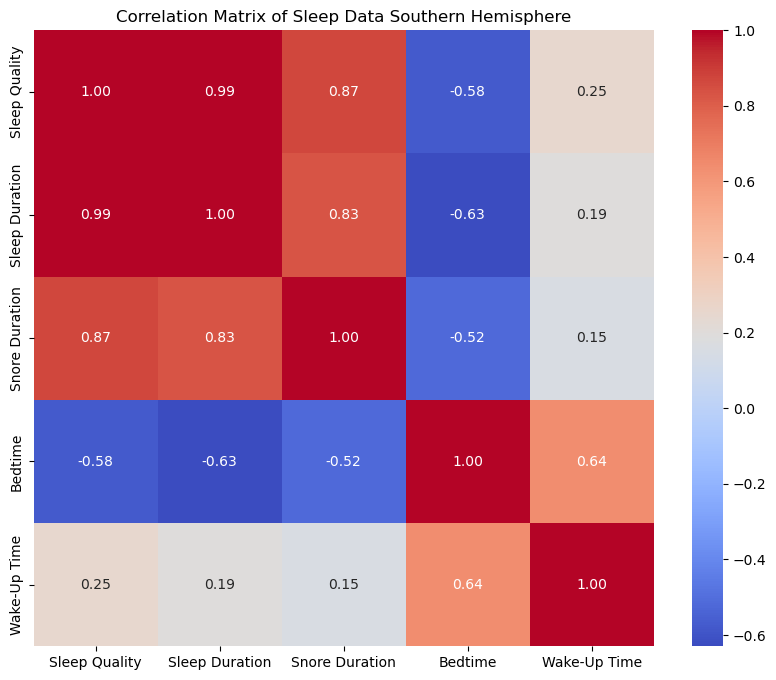

In [ ]:
df_southern = df[df['Hemisphere'] == 'Southern']

# 4. Compute correlation matrix
corr_columns = ['Sleep Quality', 'Sleep Duration (hrs)','Snore Duration', 'bedtime_minutes', 'wakeup_minutes']
corr_matrix_southern = df_southern[corr_columns].rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time', \
                       'Sleep Duration (hrs)' : 'Sleep Duration'}).corr()

print(corr_matrix_southern)

# 5. Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_southern, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sleep Data Southern Hemisphere')
# plt.savefig("./corr_matrices/corr_matrix_SH.png", dpi=300, bbox_inches='tight') 
plt.show()

# Metrics

In [8]:
def change_time_vals(df):

    df.loc['mean','wakeup_minutes'] = minutes_to_time_24h(df.loc['mean','wakeup_minutes'])
    df.loc['std','wakeup_minutes'] = minutes_to_time_24h(df.loc['std','wakeup_minutes'])
    df.loc['min','wakeup_minutes'] = minutes_to_time_24h(df.loc['min','wakeup_minutes'])
    df.loc['25%','wakeup_minutes'] = minutes_to_time_24h(df.loc['25%','wakeup_minutes'])
    df.loc['50%','wakeup_minutes'] = minutes_to_time_24h(df.loc['50%','wakeup_minutes'])
    df.loc['75%','wakeup_minutes'] = minutes_to_time_24h(df.loc['75%','wakeup_minutes'])
    df.loc['max','wakeup_minutes'] = minutes_to_time_24h(df.loc['max','wakeup_minutes'])

    df.loc['mean','bedtime_minutes'] = minutes_to_time_24h(df.loc['mean','bedtime_minutes'])
    df.loc['std','bedtime_minutes'] = minutes_to_time_24h(df.loc['std','bedtime_minutes'])
    df.loc['min','bedtime_minutes'] = minutes_to_time_24h(df.loc['min','bedtime_minutes'])
    df.loc['25%','bedtime_minutes'] = minutes_to_time_24h(df.loc['25%','bedtime_minutes'])
    df.loc['50%','bedtime_minutes'] = minutes_to_time_24h(df.loc['50%','bedtime_minutes'])
    df.loc['75%','bedtime_minutes'] = minutes_to_time_24h(df.loc['75%','bedtime_minutes'])
    df.loc['max','bedtime_minutes'] = minutes_to_time_24h(df.loc['max','bedtime_minutes'])

    return df

#Overall
print("Overall")
metrics_full = df[corr_columns].describe()
metrics_full = change_time_vals(metrics_full)
metrics_full.rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time'}, inplace = True)
display(metrics_full)
print()


#southern hemisphere
print("Southern Hemisphere")
metrics_southern = df_southern[corr_columns].describe()
metrics_southern = change_time_vals(metrics_southern)
metrics_southern.rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time'}, inplace = True)
display(metrics_southern)

#northern hemisphere
print("Northern Hemisphere")
metrics_northern = df_northern[corr_columns].describe()
metrics_northern = change_time_vals(metrics_northern)
metrics_northern.rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time'}, inplace = True)
display(metrics_northern)

# df_ds_false
print("DST False")
metrics_dst_false = df_ds_false[corr_columns].describe()
metrics_dst_false = change_time_vals(metrics_dst_false)
metrics_dst_false.rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time'}, inplace = True)
display(metrics_dst_false)

# df_ds_true
print("DST True")
metrics_dst_true = df_ds_true[corr_columns].describe()
metrics_dst_true = change_time_vals(metrics_dst_true)
metrics_dst_true.rename(columns = {'bedtime_minutes' : 'Bedtime', 'wakeup_minutes' : 'Wake-Up Time'}, inplace = True)
display(metrics_dst_true)



Overall


/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '07:34' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','wakeup_minutes'] = minutes_to_time_24h(df.loc['mean','wakeup_minutes'])
/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00:08' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','bedtime_minutes'] = minutes_to_time_24h(df.loc['mean','bedtime_minutes'])


,Sleep Quality,Sleep Duration (hrs),Snore Duration,Bedtime,Wake-Up Time
count,62.000000,62.000000,62.000000,62.0,62.0
mean,0.750724,7.435216,4.459439,00:08,07:34
std,0.029298,0.305989,0.926339,00:28,00:27
min,0.676600,6.724800,2.229000,22:59,06:17
25%,0.731350,7.232675,3.899975,23:50,07:22
50%,0.757500,7.528350,4.560400,00:05,07:37
75%,0.773500,7.657250,4.977850,00:29,07:55
max,0.803300,7.986500,6.302700,01:17,08:25



Southern Hemisphere


/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '07:11' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','wakeup_minutes'] = minutes_to_time_24h(df.loc['mean','wakeup_minutes'])
/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23:41' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','bedtime_minutes'] = minutes_to_time_24h(df.loc['mean','bedtime_minutes'])


,Sleep Quality,Sleep Duration (hrs),Snore Duration,Bedtime,Wake-Up Time
count,7.000000,7.000000,7.000000,7.0,7.0
mean,0.753357,7.498500,3.944271,23:41,07:11
std,0.036853,0.386851,0.897621,00:30,00:23
min,0.695600,6.954600,2.548700,22:59,06:40
25%,0.730950,7.239900,3.326900,23:23,06:55
50%,0.753500,7.432300,4.089100,23:43,07:16
75%,0.782350,7.818150,4.722250,23:56,07:25
max,0.797800,7.986500,4.873800,00:31,07:45


Northern Hemisphere


/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '07:37' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','wakeup_minutes'] = minutes_to_time_24h(df.loc['mean','wakeup_minutes'])
/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00:11' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','bedtime_minutes'] = minutes_to_time_24h(df.loc['mean','bedtime_minutes'])


,Sleep Quality,Sleep Duration (hrs),Snore Duration,Bedtime,Wake-Up Time
count,54.000000,54.000000,54.000000,54.0,54.0
mean,0.750378,7.426481,4.536476,00:11,07:37
std,0.028864,0.300329,0.921699,00:26,00:26
min,0.676600,6.724800,2.229000,23:14,06:17
25%,0.731750,7.228025,4.034825,23:54,07:26
50%,0.759100,7.535750,4.624600,00:07,07:38
75%,0.772675,7.642725,5.071125,00:29,07:55
max,0.803300,7.937600,6.302700,01:17,08:25


DST False


/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '07:20' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','wakeup_minutes'] = minutes_to_time_24h(df.loc['mean','wakeup_minutes'])
/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00:10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','bedtime_minutes'] = minutes_to_time_24h(df.loc['mean','bedtime_minutes'])


,Sleep Quality,Sleep Duration (hrs),Snore Duration,Bedtime,Wake-Up Time
count,25.000000,25.000000,25.000000,25.0,25.0
mean,0.725716,7.159096,4.218728,00:10,07:20
std,0.021852,0.224162,1.205517,00:34,00:31
min,0.676600,6.724800,2.229000,22:59,06:17
25%,0.713200,6.980900,3.319600,23:51,06:58
50%,0.729800,7.170800,4.032000,00:08,07:28
75%,0.738200,7.308700,5.094000,00:34,07:45
max,0.773700,7.715200,6.302700,01:04,08:10


DST True


/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '07:44' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','wakeup_minutes'] = minutes_to_time_24h(df.loc['mean','wakeup_minutes'])
/var/folders/6p/mzny4k492yv38pcpkp7_7yg80000gn/T/ipykernel_34342/3231432254.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00:05' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc['mean','bedtime_minutes'] = minutes_to_time_24h(df.loc['mean','bedtime_minutes'])


,Sleep Quality,Sleep Duration (hrs),Snore Duration,Bedtime,Wake-Up Time
count,36.000000,36.000000,36.000000,36.0,36.0
mean,0.768083,7.626169,4.641983,00:05,07:44
std,0.020295,0.191674,0.643893,00:23,00:19
min,0.690200,6.932000,2.358500,23:19,07:06
25%,0.760475,7.553375,4.402025,23:49,07:28
50%,0.771700,7.618600,4.641100,00:03,07:41
75%,0.779225,7.722025,4.866175,00:18,07:57
max,0.803300,7.986500,6.005500,01:17,08:25


In [9]:
# Norms of matrices
overall = round(np.linalg.norm(correlation_matrix - correlation_matrix), 4)
NH_distance = round(np.linalg.norm(correlation_matrix - corr_matrix_northern), 4)
SH_distance = round(np.linalg.norm(correlation_matrix - corr_matrix_southern), 4)
dst_true_distance = round(np.linalg.norm(correlation_matrix - corr_matrix_ds_true), 4)
dst_false_distance = round(np.linalg.norm(correlation_matrix - corr_matrix_ds_false), 4)



norm_df = pd.DataFrame({'Overall' : [overall], 'Northern Hemisphere' : [NH_distance], \
                        'Southern Hemisphere' : [SH_distance], 'DST True' : [dst_true_distance], 'DST False' : [dst_false_distance]})

print("Distance of correlations from overall correlations:")
display(norm_df)

Distance of correlations from overall correlations:


,Overall,Northern Hemisphere,Southern Hemisphere,DST True,DST False
0,0.0,0.1775,1.6217,1.4795,0.947


In [10]:
original_means = np.mean(correlation_matrix, axis = 0)
original_std_devs = np.std(correlation_matrix, axis = 0)

NH_means = np.mean(corr_matrix_northern, axis = 0)
NH_std_devs = np.std(corr_matrix_northern, axis = 0)

SH_means = np.mean(corr_matrix_southern, axis = 0)
SH_std_devs = np.std(corr_matrix_southern, axis = 0)

dst_true_means = np.mean(corr_matrix_ds_true, axis = 0)
dst_true_std_devs = np.std(corr_matrix_ds_true, axis = 0)

dst_false_means = np.mean(corr_matrix_ds_false, axis = 0)
dst_false_std_devs = np.std(corr_matrix_ds_false, axis = 0)

# Create MultiIndex for rows (features with mean and std)
features = original_means.index  # Get feature names from your existing data
index = pd.MultiIndex.from_product([features, ['mean', 'std']], names=['Feature', 'Metric'])

# Create empty DataFrame with the structure
corr_means_df = pd.DataFrame(index=index, columns=['Overall', 'Northern Hemisphere', 'Southern Hemisphere', 'DST True', 'DST False'])

# Fill in the data from your existing variables
for feature in features:
    # Overall
    corr_means_df.loc[(feature, 'mean'), 'Overall'] = original_means[feature]
    corr_means_df.loc[(feature, 'std'), 'Overall'] = original_std_devs[feature]
    
    # Northern Hemisphere
    corr_means_df.loc[(feature, 'mean'), 'Northern Hemisphere'] = NH_means[feature]
    corr_means_df.loc[(feature, 'std'), 'Northern Hemisphere'] = NH_std_devs[feature]
    
    # Southern Hemisphere
    corr_means_df.loc[(feature, 'mean'), 'Southern Hemisphere'] = SH_means[feature]
    corr_means_df.loc[(feature, 'std'), 'Southern Hemisphere'] = SH_std_devs[feature]
    
    # DST True
    corr_means_df.loc[(feature, 'mean'), 'DST True'] = dst_true_means[feature]
    corr_means_df.loc[(feature, 'std'), 'DST True'] = dst_true_std_devs[feature]
    
    # DST False
    corr_means_df.loc[(feature, 'mean'), 'DST False'] = dst_false_means[feature]
    corr_means_df.loc[(feature, 'std'), 'DST False'] = dst_false_std_devs[feature]

# Display the DataFrame
print("Correlation matrices mean and sd's")
print("=" * 80)
display(corr_means_df)
print("\n")

diff_df = pd.DataFrame(index=index)

# Copy Overall column
diff_df['Overall'] = corr_means_df['Overall']

# Calculate differences from Overall
diff_df['Overall - NH'] = corr_means_df['Overall'] - corr_means_df['Northern Hemisphere']
diff_df['Overall - SH'] = corr_means_df['Overall'] - corr_means_df['Southern Hemisphere']
diff_df['Overall - DST True'] = corr_means_df['Overall'] - corr_means_df['DST True']
diff_df['Overall - DST False'] = corr_means_df['Overall'] - corr_means_df['DST False']

print("\n\n Categorywise Difference of correlation mean and sd's from Overall (Overall - Each Category)")
print("=" * 80)
display(diff_df)


Correlation matrices mean and sd's


Overall Northern Hemisphere Southern Hemisphere  \
Feature        Metric                                                     
Sleep Quality  mean    0.414877            0.408339             0.50749   
               std     0.520712            0.519718            0.608945   
Sleep Duration mean    0.419172            0.426375            0.478317   
               std     0.519453            0.508553            0.628089   
Snore Duration mean    0.377851            0.347541            0.468261   
               std     0.315404            0.328638            0.573352   
Bedtime        mean    0.225516            0.237218           -0.016768   
               std     0.577392            0.563282            0.693251   
Wake-Up Time   mean    0.520087            0.528617            0.447645   
               std     0.308826            0.299879            0.325869   

                       DST True DST False  
Feature        Metric                      
Sleep Quality  mean    0.257785   0.35163  
               std      0.68643  0.524731  
Sleep Duration mean    0.322183  0.288275  
               std     0.633098  0.575694  
Snore Duration mean    0.318621  0.297955  
               std     0.438505  0.413351  
Bedtime        mean    0.054699  0.335881  
               std     0.739458  0.570709  
Wake-Up Time   mean    0.263659  0.485472  
               std     0.561058  0.402558





 Categorywise Difference of correlation mean and sd's from Overall (Overall - Each Category)


Overall Overall - NH Overall - SH Overall - DST True  \
Feature        Metric                                                          
Sleep Quality  mean    0.414877     0.006538    -0.092613           0.157092   
               std     0.520712     0.000994    -0.088233          -0.165718   
Sleep Duration mean    0.419172    -0.007203    -0.059145           0.096989   
               std     0.519453       0.0109    -0.108636          -0.113645   
Snore Duration mean    0.377851      0.03031     -0.09041            0.05923   
               std     0.315404    -0.013234    -0.257949          -0.123101   
Bedtime        mean    0.225516    -0.011702     0.242284           0.170817   
               std     0.577392      0.01411     -0.11586          -0.162067   
Wake-Up Time   mean    0.520087     -0.00853     0.072442           0.256428   
               std     0.308826     0.008948    -0.017043          -0.252232   

                      Overall - DST False  
Feature        Metric                      
Sleep Quality  mean              0.063247  
               std              -0.004019  
Sleep Duration mean              0.130897  
               std              -0.056241  
Snore Duration mean              0.079896  
               std              -0.097948  
Bedtime        mean             -0.110365  
               std               0.006683  
Wake-Up Time   mean              0.034615  
               std              -0.093732

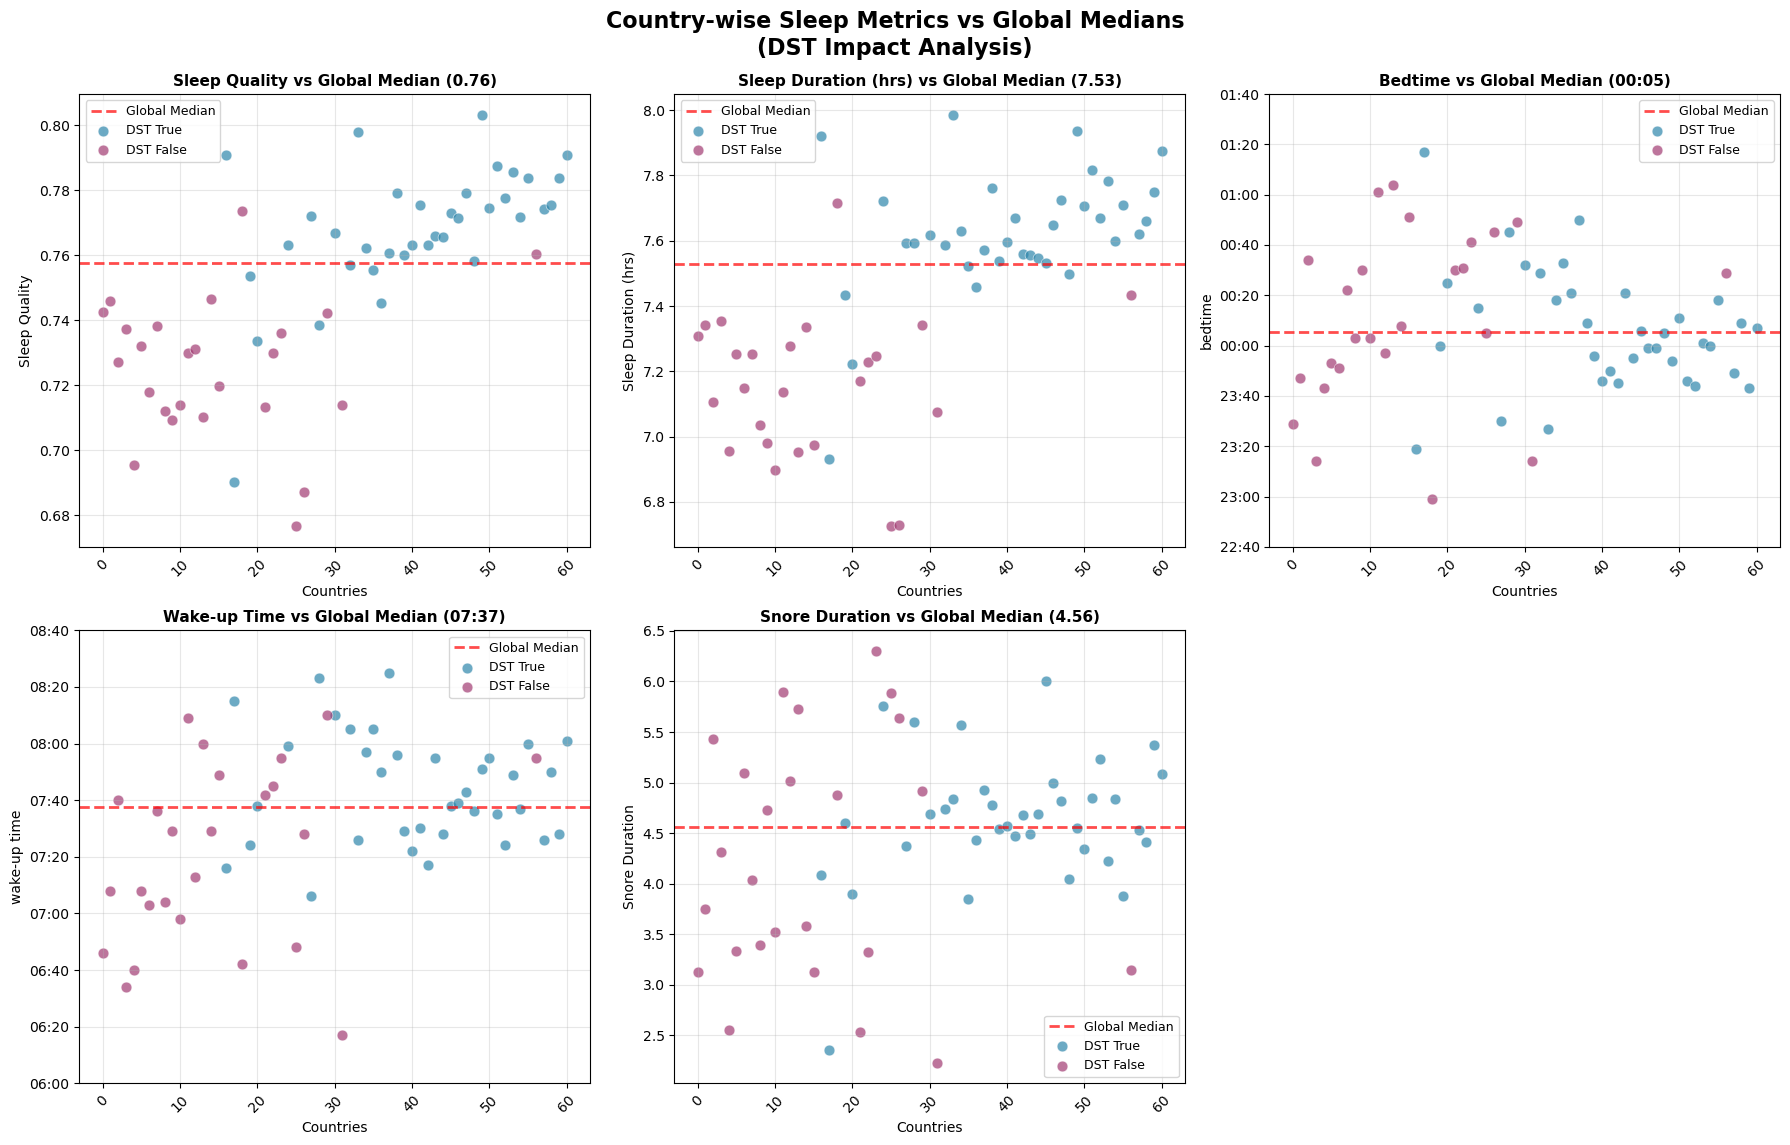

Summary by DST Status:
--------------------------------------------------

Sleep Quality:
Overall Median: 0.76
DST True Median: 0.77
DST False Median: 0.73

Sleep Duration (hrs):
Overall Median: 7.53
DST True Median: 7.62
DST False Median: 7.17

bedtime:
Overall Median: 1445.50
DST True Median: 1443.00
DST False Median: 1448.00

wake-up time:
Overall Median: 457.50
DST True Median: 461.00
DST False Median: 448.00

Snore Duration:
Overall Median: 4.56
DST True Median: 4.64
DST False Median: 4.03


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Assuming your df is already loaded and processed
# Features to plot (adjust these to match your actual column names)
plt_df = df.rename(columns = {'bedtime_minutes' : 'bedtime', 'wakeup_minutes' : 'wake-up time'})
features = ['Sleep Quality', 'Sleep Duration (hrs)', 'bedtime', 'wake-up time', 'Snore Duration']
# Convert time features back to readable format for labels
def minutes_to_time_24h(minutes):
    hours = int(minutes // 60) % 24
    mins = int(minutes % 60)
    return f"{hours:02d}:{mins:02d}"
# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten for easier indexing
# Colors for DST
colors = {'DST True': '#2E86AB', 'DST False': '#A23B72'}
for i, feature in enumerate(features):
    ax = axes[i]
    
    # Calculate median
    feature_median = plt_df[feature].median()
    
    # Create x-axis (country indices)
    x_positions = range(len(plt_df))
    
    # Plot horizontal line for median
    ax.axhline(y=feature_median, color='red', linestyle='--', linewidth=2, 
               alpha=0.7, label=f'Global Median')
    
    # Separate data by DST status
    dst_true = plt_df[plt_df['Daylight Savings'] == True]
    dst_false = plt_df[plt_df['Daylight Savings'] == False]
    
    # Plot points for DST True countries
    if not dst_true.empty:
        dst_true_indices = dst_true.index
        ax.scatter(dst_true_indices, dst_true[feature], 
                  color=colors['DST True'], alpha=0.7, s=60, 
                  label='DST True', edgecolor='white', linewidth=0.5)
    
    # Plot points for DST False countries
    if not dst_false.empty:
        dst_false_indices = dst_false.index
        ax.scatter(dst_false_indices, dst_false[feature], 
                  color=colors['DST False'], alpha=0.7, s=60, 
                  label='DST False', edgecolor='white', linewidth=0.5)
    
    # Formatting
    ax.set_xlabel('Countries', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    
    # Special formatting for time features
    if 'bedtime' in feature or 'wake-up time' in feature:
        if 'bedtime' in feature.lower():
            title = f'Bedtime vs Global Median ({minutes_to_time_24h(feature_median)})'
        else:
            title = f'Wake-up Time vs Global Median ({minutes_to_time_24h(feature_median)})'
    else:
        title = f'{feature} vs Global Median ({feature_median:.2f})'
    
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    
    # Format y-axis for time features
    if 'bedtime' in feature or 'wake-up time' in feature:
        # Get y-tick locations and set them explicitly
        yticks = ax.get_yticks()
        # Filter valid ticks and convert to time format
        valid_ticks = [tick for tick in yticks if tick >= 0]
        time_labels = [minutes_to_time_24h(tick) for tick in valid_ticks]
        # Set both ticks and labels
        ax.set_yticks(valid_ticks)
        ax.set_yticklabels(time_labels)
    
    # Rotate country labels if needed
    ax.tick_params(axis='x', rotation=45)
# Remove the empty subplot
axes[5].remove()
# Overall title
fig.suptitle('Country-wise Sleep Metrics vs Global Medians\n(DST Impact Analysis)', 
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
# plt.savefig('./graphs/dst_median_analysis.png')
plt.show()
# Optional: Print summary statistics
print("Summary by DST Status:")
print("-" * 50)
for feature in features:
    print(f"\n{feature}:")
    print(f"Overall Median: {plt_df[feature].median():.2f}")
    print(f"DST True Median: {plt_df[plt_df['Daylight Savings'] == True][feature].median():.2f}")
    print(f"DST False Median: {plt_df[plt_df['Daylight Savings'] == False][feature].median():.2f}")

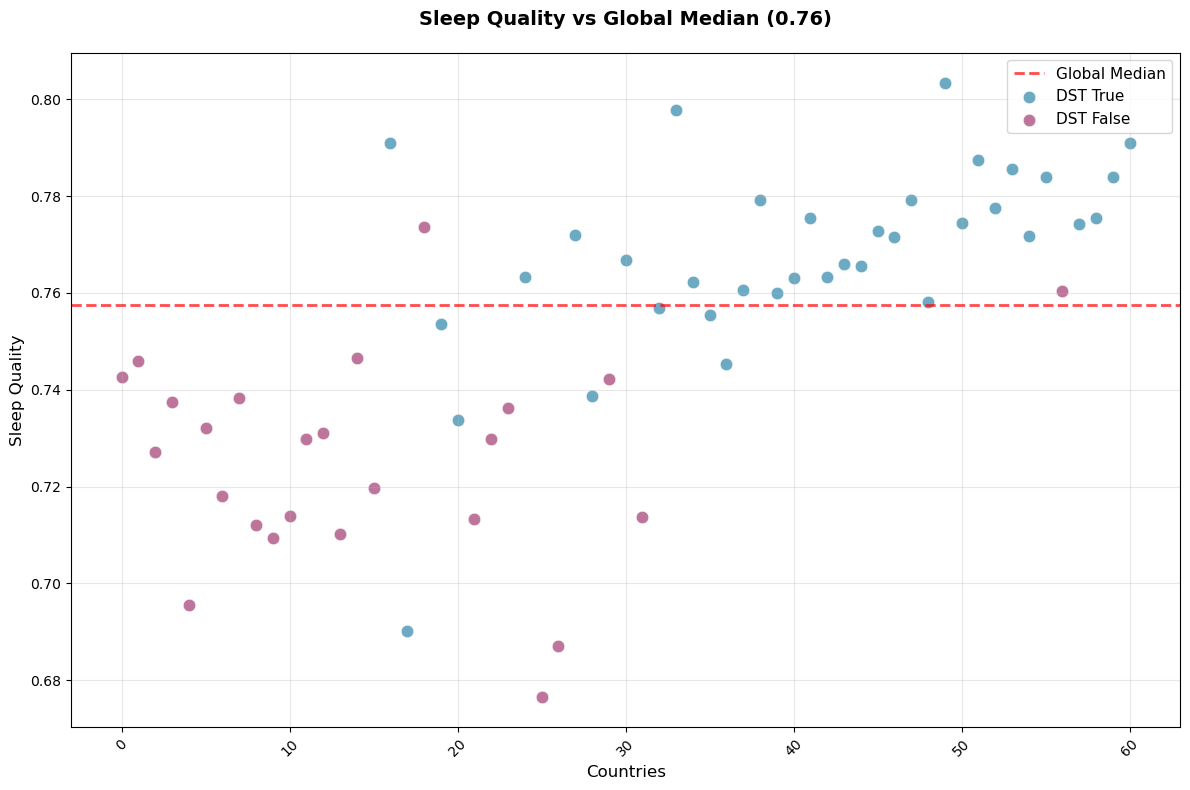

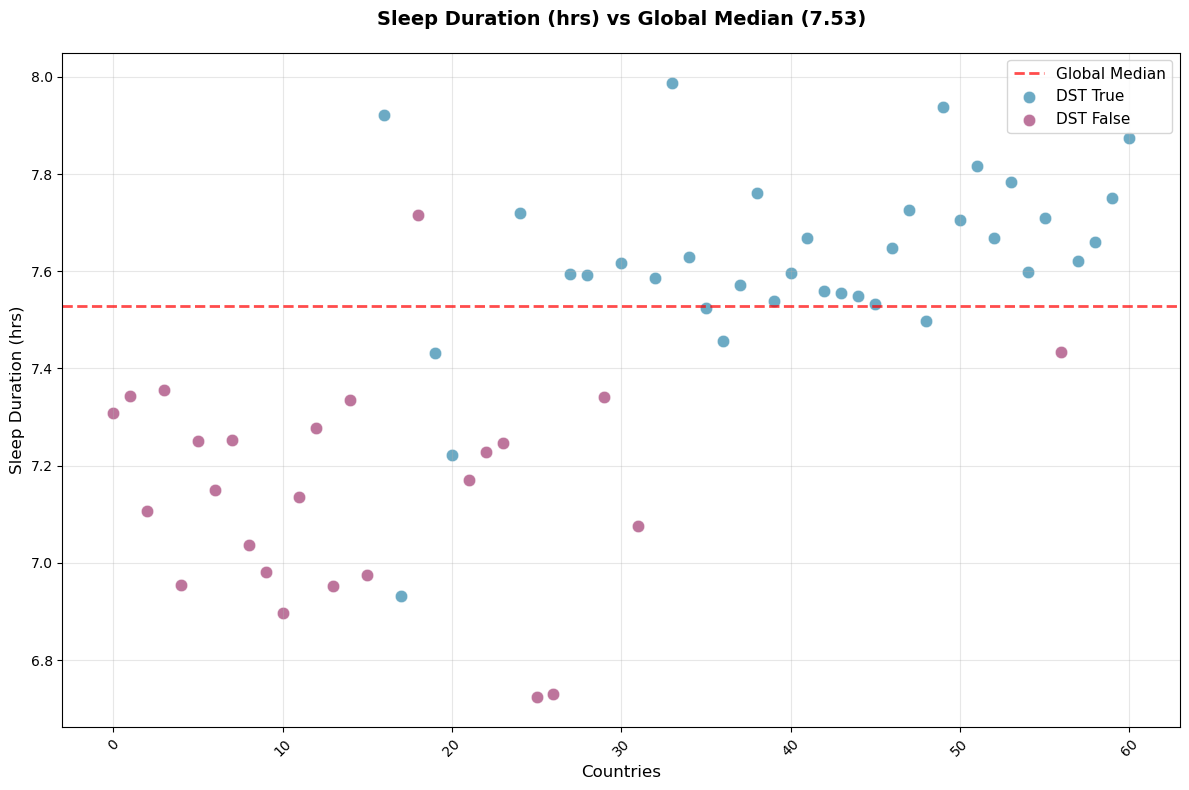

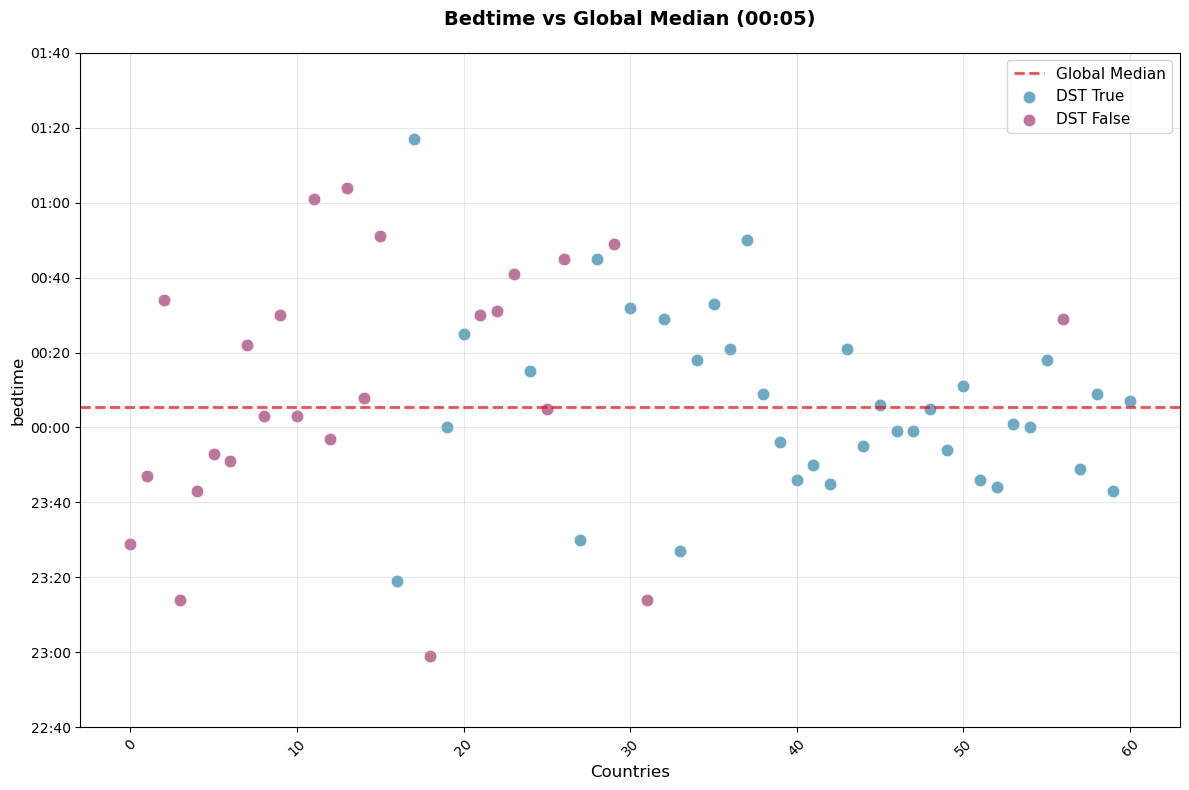

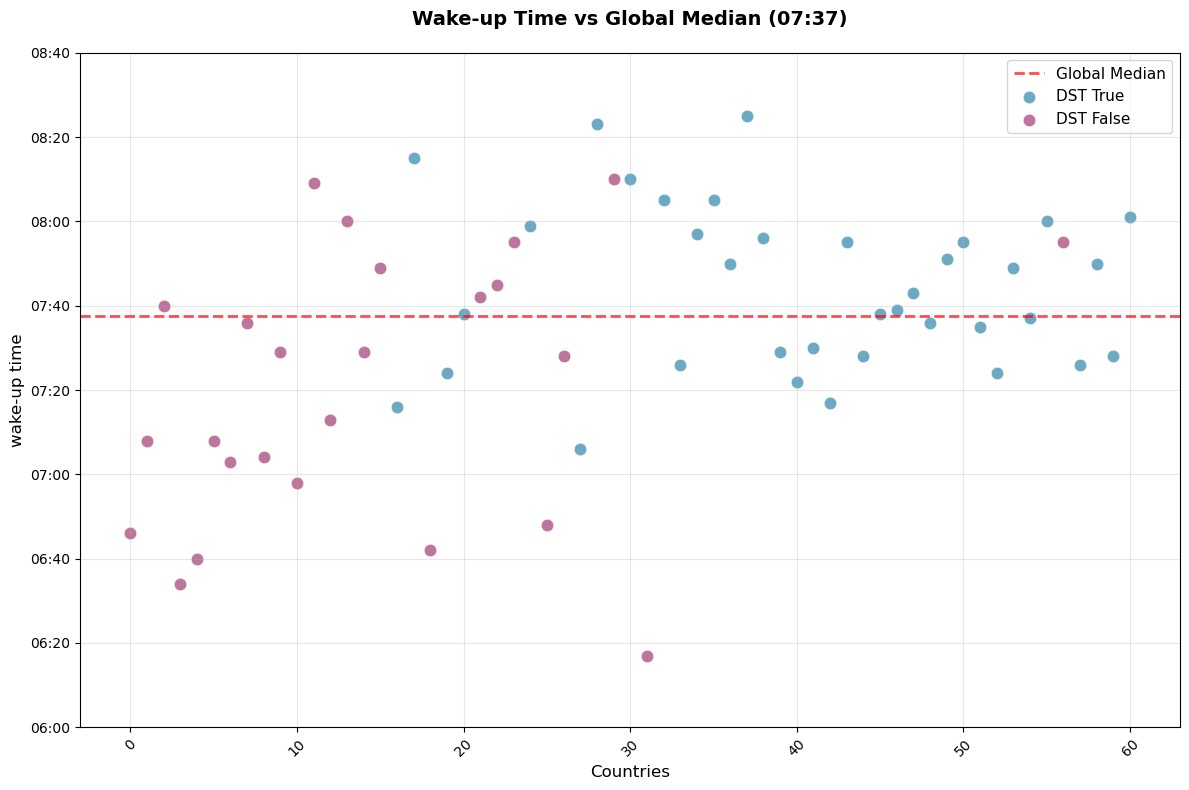

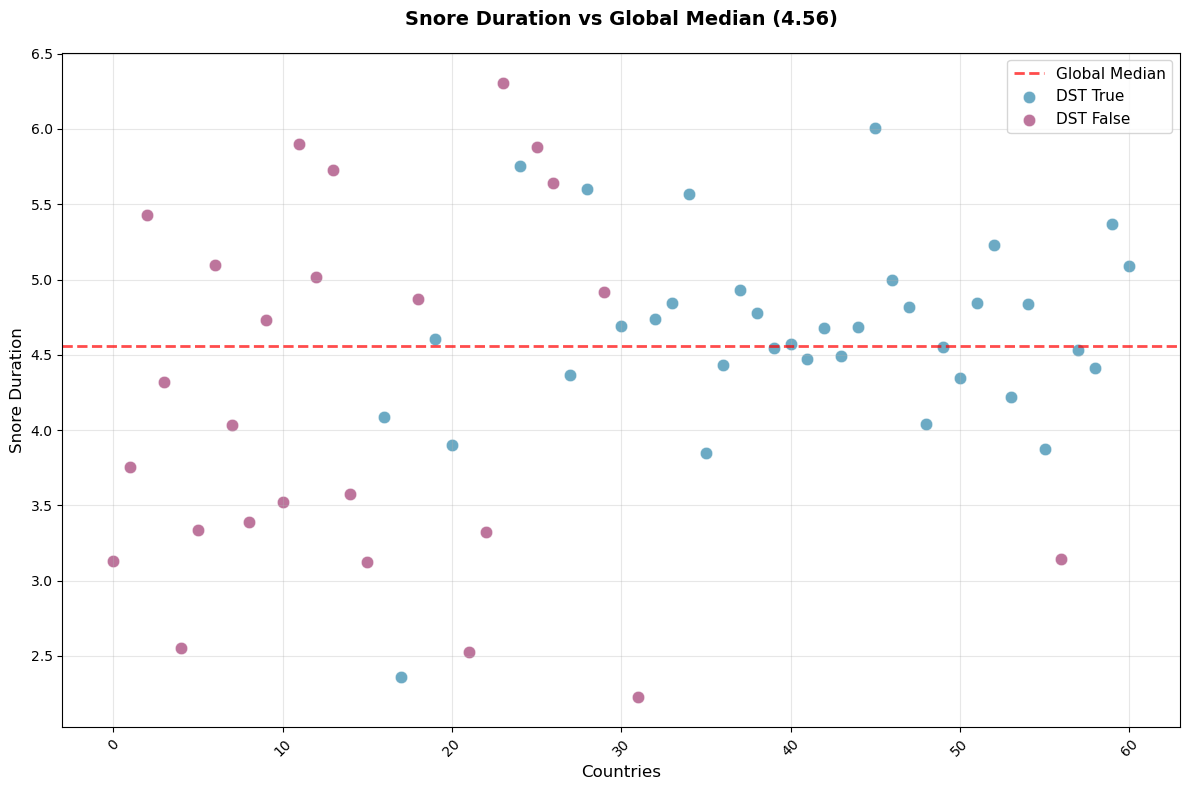


Summary by DST Status:
--------------------------------------------------

Sleep Quality:
Overall Median: 0.76
DST True Median: 0.77
DST False Median: 0.73

Sleep Duration (hrs):
Overall Median: 7.53
DST True Median: 7.62
DST False Median: 7.17

bedtime:
Overall Median: 00:05
DST True Median: 00:03
DST False Median: 00:08

wake-up time:
Overall Median: 07:37
DST True Median: 07:41
DST False Median: 07:28

Snore Duration:
Overall Median: 4.56
DST True Median: 4.64
DST False Median: 4.03


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Create directory if it doesn't exist
os.makedirs('./graphs', exist_ok=True)

# Assuming your df is already loaded and processed
# Features to plot (adjust these to match your actual column names)
plt_df = df.rename(columns={'bedtime_minutes': 'bedtime', 'wakeup_minutes': 'wake-up time'})
features = ['Sleep Quality', 'Sleep Duration (hrs)', 'bedtime', 'wake-up time', 'Snore Duration']

# Convert time features back to readable format for labels
def minutes_to_time_24h(minutes):
    hours = int(minutes // 60) % 24
    mins = int(minutes % 60)
    return f"{hours:02d}:{mins:02d}"

# Colors for DST
colors = {'DST True': '#2E86AB', 'DST False': '#A23B72'}

# Create and save each plot separately
for i, feature in enumerate(features):
    # Create individual figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Calculate median
    feature_median = plt_df[feature].median()
    
    # Create x-axis (country indices)
    x_positions = range(len(plt_df))
    
    # Plot horizontal line for median
    ax.axhline(y=feature_median, color='red', linestyle='--', linewidth=2, 
               alpha=0.7, label=f'Global Median')
    
    # Separate data by DST status
    dst_true = plt_df[plt_df['Daylight Savings'] == True]
    dst_false = plt_df[plt_df['Daylight Savings'] == False]
    
    # Plot points for DST True countries
    if not dst_true.empty:
        dst_true_indices = dst_true.index
        ax.scatter(dst_true_indices, dst_true[feature], 
                  color=colors['DST True'], alpha=0.7, s=80, 
                  label='DST True', edgecolor='white', linewidth=0.5)
    
    # Plot points for DST False countries
    if not dst_false.empty:
        dst_false_indices = dst_false.index
        ax.scatter(dst_false_indices, dst_false[feature], 
                  color=colors['DST False'], alpha=0.7, s=80, 
                  label='DST False', edgecolor='white', linewidth=0.5)
    
    # Formatting
    ax.set_xlabel('Countries', fontsize=12)
    ax.set_ylabel(feature, fontsize=12)
    
    # Special formatting for time features
    if 'bedtime' in feature or 'wake-up time' in feature:
        if 'bedtime' in feature.lower():
            title = f'Bedtime vs Global Median ({minutes_to_time_24h(feature_median)})'
            filename = 'bedtime_vs_median.png'
        else:
            title = f'Wake-up Time vs Global Median ({minutes_to_time_24h(feature_median)})'
            filename = 'wakeup_time_vs_median.png'
    else:
        title = f'{feature} vs Global Median ({feature_median:.2f})'
        # Clean filename
        filename = f'{feature.lower().replace(" ", "_").replace("(", "").replace(")", "")}_vs_median.png'
    
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11, loc='best')
    
    # Format y-axis for time features
    if 'bedtime' in feature or 'wake-up time' in feature:
        # Get y-tick locations and set them explicitly
        yticks = ax.get_yticks()
        # Filter valid ticks and convert to time format
        valid_ticks = [tick for tick in yticks if tick >= 0]
        time_labels = [minutes_to_time_24h(tick) for tick in valid_ticks]
        # Set both ticks and labels
        ax.set_yticks(valid_ticks)
        ax.set_yticklabels(time_labels)
    
    # Rotate country labels if needed
    ax.tick_params(axis='x', rotation=45)
    
    # Adjust layout and save
    plt.tight_layout()
    # plt.savefig(f'./graphs/{filename}', dpi=300, bbox_inches='tight')    
    # Show the plot (optional - comment out if you don't want to display)
    plt.show()
    
    # Close the figure to free memory
    plt.close()

# Optional: Print summary statistics
print("\nSummary by DST Status:")
print("-" * 50)
for feature in features:
    dst_true_median = plt_df[plt_df['Daylight Savings'] == True][feature].median()
    dst_false_median = plt_df[plt_df['Daylight Savings'] == False][feature].median()
    overall_median = plt_df[feature].median()
    
    print(f"\n{feature}:")
    if 'bedtime' in feature.lower() or 'wake-up time' in feature.lower():
        print(f"Overall Median: {minutes_to_time_24h(overall_median)}")
        print(f"DST True Median: {minutes_to_time_24h(dst_true_median)}")
        print(f"DST False Median: {minutes_to_time_24h(dst_false_median)}")
    else:
        print(f"Overall Median: {overall_median:.2f}")
        print(f"DST True Median: {dst_true_median:.2f}")
        print(f"DST False Median: {dst_false_median:.2f}")



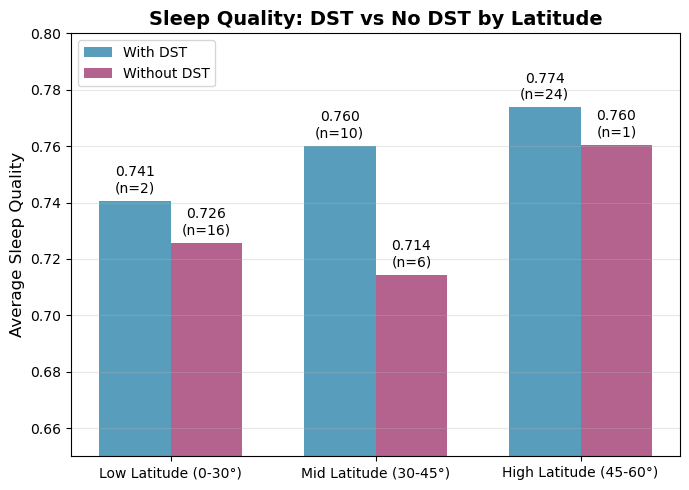

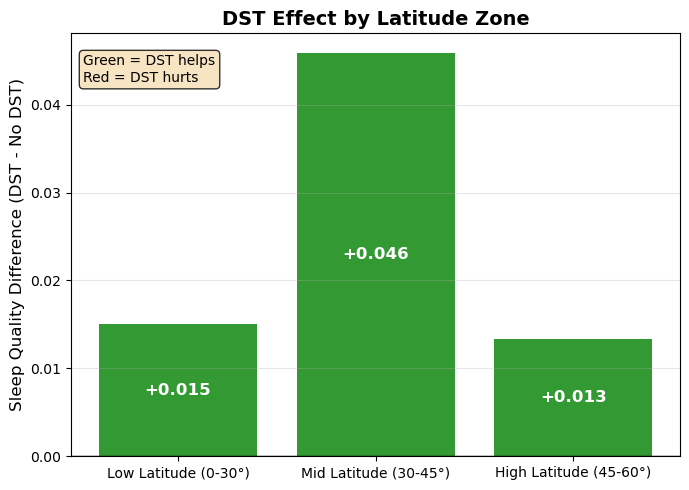

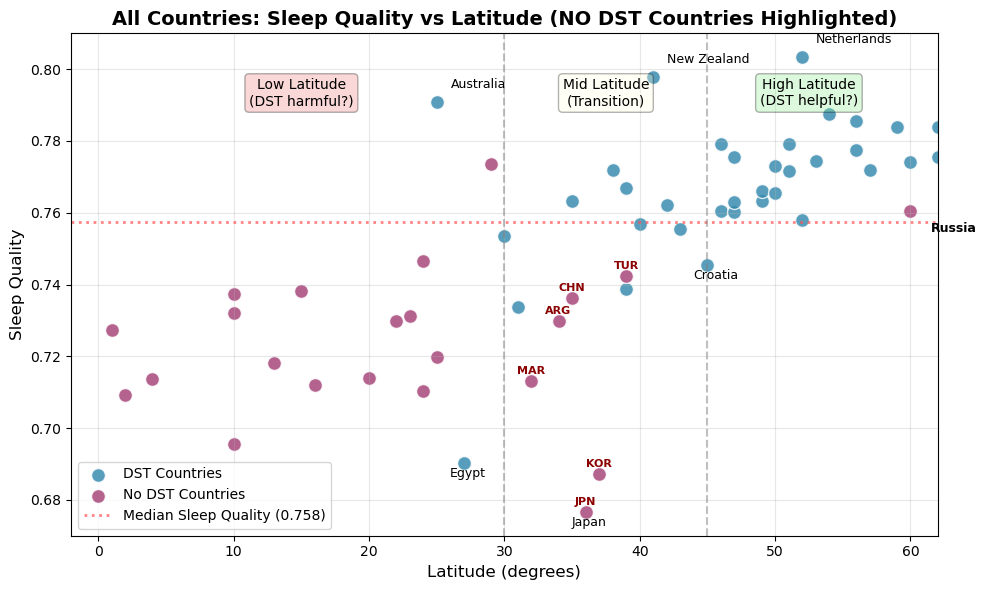


NO DST Countries in High Latitude Zone (45°+):
  • Russia (60.0°): Sleep Quality = 0.760

SUMMARY: DST EFFECT BY LATITUDE
         Latitude Zone  DST Countries  No DST Countries Avg Sleep Quality (DST) Avg Sleep Quality (No DST) Difference DST Effect
  Low Latitude (0-30°)              2                16                   0.741                      0.726     +0.015    HELPFUL
 Mid Latitude (30-45°)             10                 6                   0.760                      0.714     +0.046    HELPFUL
High Latitude (45-60°)             24                 1                   0.774                      0.760     +0.013    HELPFUL

KEY FINDING:
• At LOW latitudes (0-30°):    DST appears HARMFUL   (difference < 0)
• At MID latitudes (30-45°):   DST effect is MIXED
• At HIGH latitudes (45-60°):  DST appears HELPFUL   (difference > 0)


In [17]:
# Simple analysis to show DST effect by latitude
import re

# Extract numeric latitude
def extract_numeric_latitude(lat_str):
    if pd.isna(lat_str):
        return np.nan
    match = re.search(r'(\d+)°([NS])', str(lat_str))
    if match:
        degrees = int(match.group(1))
        return degrees
    return np.nan

df['numeric_latitude'] = df['Approximate Latitude'].apply(extract_numeric_latitude)

# Create simple latitude groups
def latitude_group(lat):
    if pd.isna(lat):
        return None
    elif lat < 30:
        return 'Low Latitude (0-30°)'
    elif lat < 45:
        return 'Mid Latitude (30-45°)'
    else:
        return 'High Latitude (45-60°)'

df['lat_group'] = df['numeric_latitude'].apply(latitude_group)

# Calculate data for all plots
groups = ['Low Latitude (0-30°)', 'Mid Latitude (30-45°)', 'High Latitude (45-60°)']
x_pos = np.arange(len(groups))
width = 0.35

dst_means = []
no_dst_means = []
dst_counts = []
no_dst_counts = []

for group in groups:
    group_data = df[df['lat_group'] == group]
    dst_data = group_data[group_data['Daylight Savings'] == 1]
    no_dst_data = group_data[group_data['Daylight Savings'] == 0]
    
    dst_means.append(dst_data['Sleep Quality'].mean() if len(dst_data) > 0 else 0)
    no_dst_means.append(no_dst_data['Sleep Quality'].mean() if len(no_dst_data) > 0 else 0)
    dst_counts.append(len(dst_data))
    no_dst_counts.append(len(no_dst_data))

# PLOT 1: Direct Comparison by Latitude Group
plt.figure(figsize=(7, 5))  # Good for single column in LaTeX

# Create bars
bars1 = plt.bar(x_pos - width/2, dst_means, width, label='With DST', color='#2E86AB', alpha=0.8)
bars2 = plt.bar(x_pos + width/2, no_dst_means, width, label='Without DST', color='#A23B72', alpha=0.8)

# Add value labels and sample sizes
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # DST bar
    height1 = bar1.get_height()
    if height1 > 0:
        plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.002,
                f'{height1:.3f}\n(n={dst_counts[i]})', ha='center', va='bottom', fontsize=10)
    
    # No DST bar
    height2 = bar2.get_height()
    if height2 > 0:
        plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.002,
                f'{height2:.3f}\n(n={no_dst_counts[i]})', ha='center', va='bottom', fontsize=10)

plt.ylabel('Average Sleep Quality', fontsize=12)
plt.title('Sleep Quality: DST vs No DST by Latitude', fontsize=14, fontweight='bold')
plt.xticks(x_pos, groups)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0.65, 0.8)
plt.tight_layout()
# plt.savefig('plot1_comparison_by_latitude.pdf', dpi=300, bbox_inches='tight')
plt.show()

# PLOT 2: DST Effect (Difference) by Latitude
plt.figure(figsize=(7, 5))

differences = [dst - no_dst for dst, no_dst in zip(dst_means, no_dst_means)]
colors = ['red' if d < 0 else 'green' for d in differences]

bars = plt.bar(groups, differences, color=colors, alpha=0.8)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.ylabel('Sleep Quality Difference (DST - No DST)', fontsize=12)
plt.title('DST Effect by Latitude Zone', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, diff in zip(bars, differences):
    height = bar.get_height()
    if abs(height) > 0.001:
        plt.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{height:+.3f}', ha='center', va='center', fontsize=12, 
                fontweight='bold', color='white')

# Add interpretation text
plt.text(0.02, 0.95, 'Green = DST helps\nRed = DST hurts', 
        transform=plt.gca().transAxes, fontsize=10,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
        verticalalignment='top')

plt.tight_layout()
# plt.savefig('plot2_dst_effect_difference.pdf', dpi=300, bbox_inches='tight')
plt.show()

# PLOT 3: Scatter plot with all countries
plt.figure(figsize=(10, 6))  # Wider for better country label visibility

# Plot all countries
dst_countries = df[df['Daylight Savings'] == 1]
no_dst_countries = df[df['Daylight Savings'] == 0]

plt.scatter(dst_countries['numeric_latitude'], dst_countries['Sleep Quality'],
           s=100, alpha=0.8, color='#2E86AB', label='DST Countries', edgecolor='white', linewidth=1)
plt.scatter(no_dst_countries['numeric_latitude'], no_dst_countries['Sleep Quality'],
           s=100, alpha=0.8, color='#A23B72', label='No DST Countries', edgecolor='white', linewidth=1)

# Add median line
median_sleep_quality = df['Sleep Quality'].median()
plt.axhline(y=median_sleep_quality, color='#ff5252', linestyle=':', linewidth=2, alpha=0.7, 
           label=f'Median Sleep Quality ({median_sleep_quality:.3f})')

# Add zone boundaries
plt.axvline(x=30, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=45, color='gray', linestyle='--', alpha=0.5)

# Add zone labels
plt.text(15, 0.79, 'Low Latitude\n(DST harmful?)', ha='center', fontsize=10, 
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))
plt.text(37.5, 0.79, 'Mid Latitude\n(Transition)', ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.3))
plt.text(52.5, 0.79, 'High Latitude\n(DST helpful?)', ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

# Find and label extremes in each zone
zones = [
    ('Low', 0, 30),
    ('Mid', 30, 45),
    ('High', 45, 60)
]

for zone_name, min_lat, max_lat in zones:
    zone_data = df[(df['numeric_latitude'] >= min_lat) & (df['numeric_latitude'] < max_lat)]
    
    if len(zone_data) > 0:
        # Find highest and lowest
        highest = zone_data.nlargest(1, 'Sleep Quality').iloc[0]
        lowest = zone_data.nsmallest(1, 'Sleep Quality').iloc[0]
        
        # Special handling for Russia (high latitude zone)
        if highest['Country'] == 'Russia' and zone_name == 'High':
            plt.annotate(
                f"{highest['Country']}",
                xy=(highest['numeric_latitude'], highest['Sleep Quality']),
                xytext=(-15, 5),
                textcoords='offset points',
                fontsize=9,
                ha='right'
            )
        else:
            # Label highest
            plt.annotate(
                f"{highest['Country']}",
                xy=(highest['numeric_latitude'], highest['Sleep Quality']),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=9,
            )
        
        # Label lowest
        plt.annotate(
            f"{lowest['Country']}",
            xy=(lowest['numeric_latitude'], lowest['Sleep Quality']),
            xytext=(-10, -10),
            textcoords='offset points',
            fontsize=9,
        )

# Create country abbreviations dictionary
country_abbrev = {
    'Japan': 'JPN',
    'South Korea': 'KOR',
    'Taiwan': 'TWN',
    'India': 'IND',
    'China': 'CHN',
    'Russia': 'RUS',
    'Turkey': 'TUR',
    'Pakistan': 'PAK',
    'Bangladesh': 'BGD',
    'Iran': 'IRN',
    'Iraq': 'IRQ',
    'Saudi Arabia': 'SAU',
    'Argentina': 'ARG',
    'South Africa': 'ZAF',
    'Morocco': 'MAR',
    'Algeria': 'DZA',
    'Nepal': 'NPL',
    'Afghanistan': 'AFG',
    'Iceland': 'ISL',
    'Kazakhstan': 'KAZ'
}

# Special labeling for NO DST countries in mid-latitude zone
mid_lat_no_dst = df[(df['numeric_latitude'] >= 30) & 
                    (df['numeric_latitude'] < 45) & 
                    (df['Daylight Savings'] == 0)]

# Label each NO DST country in mid-latitude
for idx, country in mid_lat_no_dst.iterrows():
    # Get abbreviation or use first 3 letters
    abbrev = country_abbrev.get(country['Country'], country['Country'][:3].upper())
    
    # Add label with slight offset to avoid overlap
    plt.annotate(
        abbrev,
        xy=(country['numeric_latitude'], country['Sleep Quality']),
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=8,
        fontweight='bold',
        color='darkred',
        ha='center'
    )

# Special labeling for NO DST countries in HIGH latitude zone
high_lat_no_dst = df[(df['numeric_latitude'] >= 45) & 
                     (df['Daylight Savings'] == 0)]

# Label NO DST countries in high latitude with special emphasis
for idx, country in high_lat_no_dst.iterrows():
    plt.annotate(
        f"{country['Country']}",
        xy=(country['numeric_latitude'], country['Sleep Quality']),
        xytext=(15, -15),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold'
    )

plt.xlabel('Latitude (degrees)', fontsize=12)
plt.ylabel('Sleep Quality', fontsize=12)
plt.title('All Countries: Sleep Quality vs Latitude (NO DST Countries Highlighted)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-2, 62)
plt.ylim(0.67, 0.81)
plt.tight_layout()
# plt.savefig('plot3_scatter_all_countries.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Print summary information
print("\nNO DST Countries in High Latitude Zone (45°+):")
for idx, country in high_lat_no_dst.iterrows():
    print(f"  • {country['Country']} ({country['numeric_latitude']}°): Sleep Quality = {country['Sleep Quality']:.3f}")

print("\n" + "="*70)
print("SUMMARY: DST EFFECT BY LATITUDE")
print("="*70)

summary_data = []
for group in groups:
    group_data = df[df['lat_group'] == group]
    dst_data = group_data[group_data['Daylight Savings'] == 1]
    no_dst_data = group_data[group_data['Daylight Savings'] == 0]
    
    if len(dst_data) > 0 and len(no_dst_data) > 0:
        dst_quality = dst_data['Sleep Quality'].mean()
        no_dst_quality = no_dst_data['Sleep Quality'].mean()
        difference = dst_quality - no_dst_quality
        
        summary_data.append({
            'Latitude Zone': group,
            'DST Countries': len(dst_data),
            'No DST Countries': len(no_dst_data),
            'Avg Sleep Quality (DST)': f"{dst_quality:.3f}",
            'Avg Sleep Quality (No DST)': f"{no_dst_quality:.3f}",
            'Difference': f"{difference:+.3f}",
            'DST Effect': 'HELPFUL' if difference > 0 else 'HARMFUL'
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "="*70)
print("KEY FINDING:")
print("="*70)
print("• At LOW latitudes (0-30°):    DST appears HARMFUL   (difference < 0)")
print("• At MID latitudes (30-45°):   DST effect is MIXED")  
print("• At HIGH latitudes (45-60°):  DST appears HELPFUL   (difference > 0)")
print("="*70)

# DST classifiers

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Parse latitude to numeric
def parse_latitude(lat_str):
    if pd.isna(lat_str) or lat_str == '0°':
        return 0
    try:
        # Extract numeric value
        numeric_part = ''.join(c for c in lat_str if c.isdigit() or c == '.')
        if numeric_part:
            lat_value = float(numeric_part)
            # Make negative if Southern hemisphere
            if 'S' in lat_str:
                lat_value = -lat_value
            return lat_value
    except:
        return 0
    return 0

def cross_validation(classifier, X, y, folds = 10, classifier_name = ""):

    fold_accuracies_test = []
    
    kf = KFold(n_splits=folds, shuffle=True)
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"Training fold {fold+1}/10...")
        
        # Split data into training and test set for this fold
        X_train_fold = X[train_idx]
        y_train_fold = y[train_idx]
        X_test_fold = X[test_idx]
        y_test_fold = y[test_idx]
    
        classifier.fit(X_train_fold, y_train_fold)
        
        # Make predictions
        y_pred_fold_test = classifier.predict(X_test_fold)
        
        # Calculate accuracy for this fold
        fold_accuracy_test = accuracy_score(y_test_fold, y_pred_fold_test)
    
        fold_accuracies_test.append(fold_accuracy_test)
    
    
    # Calculate and print overall results
    mean_accuracy_test = np.mean(fold_accuracies_test)
    print()
    print(f"Mean Accuracy Test {classifier_name}: {round(mean_accuracy_test * 100, 2)}%")


# Create latitude feature
df['latitude_numeric'] = df['Approximate Latitude'].apply(parse_latitude)

# Define features
feature_names = ['Sleep Quality', 'Sleep Duration (hrs)', 'bedtime_minutes', 
                'wakeup_minutes', 'Snore Duration', 'latitude_numeric']

# Prepare data
X = df[feature_names].copy().to_numpy()
y = df['Daylight Savings'].to_numpy()


# Remove any rows with missing values
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train classifier
classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    n_jobs=-1
)

cross_validation(classifier, X_scaled, y, classifier_name = 'Random Forests')

importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': classifier.feature_importances_
    }).sort_values('Importance', ascending=False)

display(importance_df)


Training fold 1/10...
Training fold 2/10...
Training fold 3/10...
Training fold 4/10...
Training fold 5/10...
Training fold 6/10...
Training fold 7/10...
Training fold 8/10...
Training fold 9/10...
Training fold 10/10...

Mean Accuracy Test Random Forests: 90.0%


,Feature,Importance
1,Sleep Duration (hrs),0.346762
0,Sleep Quality,0.213290
5,latitude_numeric,0.184370
3,wakeup_minutes,0.098522
4,Snore Duration,0.084056
2,bedtime_minutes,0.073000


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=5,      # Number of neighbors to consider
    weights='uniform',  # Weighting strategy
    p=2                 # Euclidean distance
)

cross_validation(knn, X_scaled, y, classifier_name='KNN')

Training fold 1/10...
Training fold 2/10...
Training fold 3/10...
Training fold 4/10...
Training fold 5/10...
Training fold 6/10...
Training fold 7/10...
Training fold 8/10...
Training fold 9/10...
Training fold 10/10...

Mean Accuracy Test KNN: 86.67%


In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    penalty='l2',           # Regularization type
    C=1.0,                  # Inverse regularization strength
    solver='lbfgs',         # Optimization algorithm
    max_iter=1000,          # Maximum iterations
    random_state=42
)

def cross_validation_logistic(classifier, X, y, feature_names, folds=10, classifier_name=""):
    fold_accuracies = []
    coefficients = []
    
    kf = KFold(n_splits=folds, shuffle=True)
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"Training fold {fold+1}/{folds}...")
        
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(fold_accuracy)
        coefficients.append(classifier.coef_[0])  # Store coefficients
    
    # Calculate and display results
    mean_accuracy = np.mean(fold_accuracies)
    print(f"\nMean Test Accuracy {classifier_name}: {round(mean_accuracy * 100, 2)}%")
    
    # Average coefficients across folds
    avg_coef = np.mean(coefficients, axis=0)
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Avg_Coefficient': avg_coef
    }).sort_values('Avg_Coefficient', key=abs, ascending=False)
    
    print("\nFeature Coefficients:")
    display(coef_df)

# Execute cross-validation for Logistic Regression
cross_validation_logistic(logreg, X_scaled, y, feature_names, classifier_name='Logistic Regression')


Training fold 1/10...
Training fold 2/10...
Training fold 3/10...
Training fold 4/10...
Training fold 5/10...
Training fold 6/10...
Training fold 7/10...
Training fold 8/10...
Training fold 9/10...
Training fold 10/10...

Mean Test Accuracy Logistic Regression: 88.57%

Feature Coefficients:


,Feature,Avg_Coefficient
1,Sleep Duration (hrs),1.417739
3,wakeup_minutes,0.835966
0,Sleep Quality,0.717091
5,latitude_numeric,0.618177
4,Snore Duration,-0.171429
2,bedtime_minutes,-0.159086


# DST predictor on Latitude and equinox

In [29]:
 #Create latitude feature
df['latitude_numeric'] = df['Approximate Latitude'].apply(parse_latitude)

# Define features
feature_names = ['latitude_numeric', 'Longest night / equinox night']

# Prepare data
X = df[feature_names].copy().to_numpy()
y = df['Daylight Savings'].to_numpy()


# Remove any rows with missing values
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train classifier
classifier = RandomForestClassifier(
    n_estimators=6,
    max_depth=None,
    n_jobs=-1
)

cross_validation(classifier, X_scaled, y, classifier_name = 'Random Forests')

importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': classifier.feature_importances_
    }).sort_values('Importance', ascending=False)

display(importance_df)


Training fold 1/10...
Training fold 2/10...
Training fold 3/10...
Training fold 4/10...
Training fold 5/10...
Training fold 6/10...
Training fold 7/10...
Training fold 8/10...
Training fold 9/10...
Training fold 10/10...

Mean Accuracy Test Random Forests: 78.57%


,Feature,Importance
0,latitude_numeric,0.630615
1,Longest night / equinox night,0.369385


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=4,      # Number of neighbors to consider
    weights='uniform',  # Weighting strategy
    p=2                 # Euclidean distance
)

cross_validation(knn, X_scaled, y, classifier_name='KNN')

Training fold 1/10...
Training fold 2/10...
Training fold 3/10...
Training fold 4/10...
Training fold 5/10...
Training fold 6/10...
Training fold 7/10...
Training fold 8/10...
Training fold 9/10...
Training fold 10/10...

Mean Accuracy Test KNN: 80.24%


In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Perform cross-validation
cross_validation(classifier, X_scaled, y, classifier_name='Naive Bayes')

# Fit the classifier to get feature analysis
classifier.fit(X_scaled, y)

Training fold 1/10...
Training fold 2/10...
Training fold 3/10...
Training fold 4/10...
Training fold 5/10...
Training fold 6/10...
Training fold 7/10...
Training fold 8/10...
Training fold 9/10...
Training fold 10/10...

Mean Accuracy Test Naive Bayes: 81.9%


GaussianNB()

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    penalty='l2',           # Regularization type
    C=1.0,                  # Inverse regularization strength
    solver='lbfgs',         # Optimization algorithm
    max_iter=1000,          # Maximum iterations
)

def cross_validation_logistic(classifier, X, y, feature_names, folds=10, classifier_name=""):
    fold_accuracies = []
    coefficients = []
    
    kf = KFold(n_splits=folds, shuffle=True)
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"Training fold {fold+1}/{folds}...")
        
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(fold_accuracy)
        coefficients.append(classifier.coef_[0])  # Store coefficients
    
    # Calculate and display results
    mean_accuracy = np.mean(fold_accuracies)
    print(f"\nMean Test Accuracy {classifier_name}: {round(mean_accuracy * 100, 2)}%")
    
    # Average coefficients across folds
    avg_coef = np.mean(coefficients, axis=0)
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Avg_Coefficient': avg_coef
    }).sort_values('Avg_Coefficient', key=abs, ascending=False)
    
    print("\nFeature Coefficients:")
    display(coef_df)

# Execute cross-validation for Logistic Regression
cross_validation_logistic(logreg, X_scaled, y, feature_names, classifier_name='Logistic Regression')


Training fold 1/10...
Training fold 2/10...
Training fold 3/10...
Training fold 4/10...
Training fold 5/10...
Training fold 6/10...
Training fold 7/10...
Training fold 8/10...
Training fold 9/10...
Training fold 10/10...

Mean Test Accuracy Logistic Regression: 80.24%

Feature Coefficients:


,Feature,Avg_Coefficient
0,latitude_numeric,0.885853
1,Longest night / equinox night,0.761114



Processing Random Forest...

Processing KNN...

Processing Naive Bayes (Gaussian)...

Processing Logistic Regression...


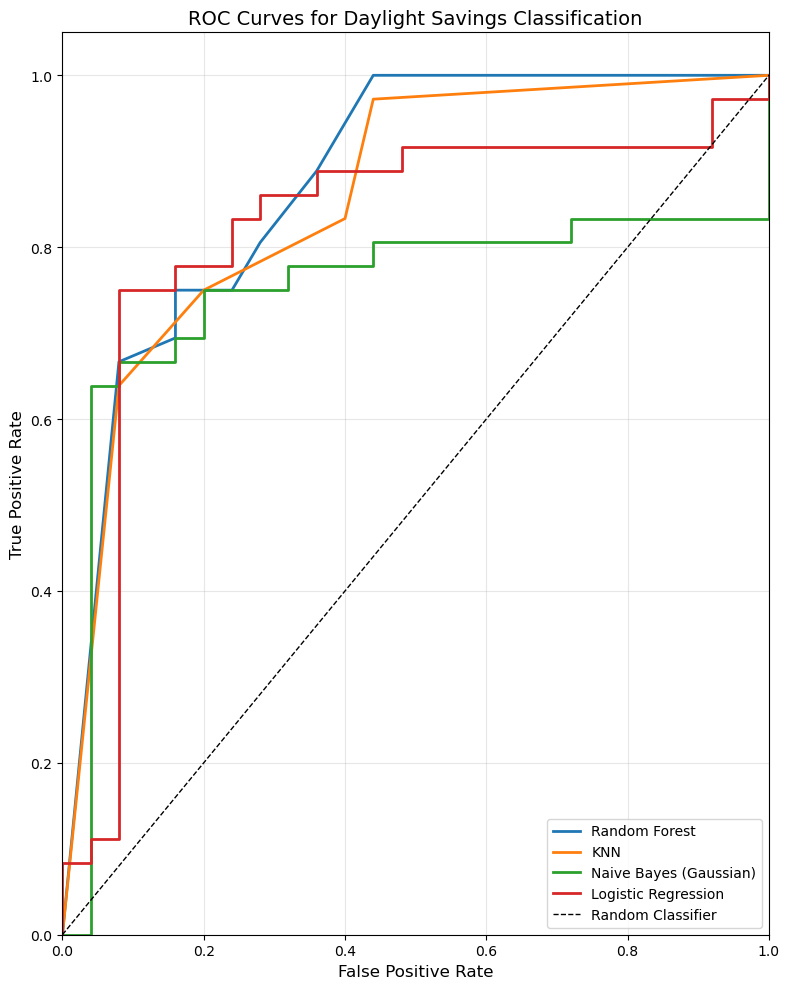


AUC Scores Summary:


,Classifier,AUC Score
0,Random Forest,0.875556
1,KNN,0.855556
3,Logistic Regression,0.820000
2,Naive Bayes (Gaussian),0.748889


In [35]:
# Initialize classifiers
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=6, max_depth=None, n_jobs=-1),
    'KNN': KNeighborsClassifier(n_neighbors=4, weights='uniform', p=2),
    'Naive Bayes (Gaussian)': GaussianNB(),
    'Logistic Regression': LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
}

# Store ROC data
roc_data = {}

# Create figure for ROC curves
plt.figure(figsize=(8, 10))

# Process each classifier
for name, clf in classifiers.items():
    print(f"\nProcessing {name}...")
    
    # Get probability predictions using cross-validation
    # This gives us out-of-fold predictions for the entire dataset
    y_proba = cross_val_predict(clf, X_scaled, y, cv=10, method='predict_proba')
    
    # Get probabilities for the positive class (DST = 1)
    y_scores = y_proba[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Store data
    roc_data[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }
    
    # Plot ROC curve
    plt.plot(fpr, tpr, linewidth=2, label=f'{name}')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Daylight Savings Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
# plt.savefig('ROC.png')
plt.show()


# Display AUC scores in a table
auc_scores = pd.DataFrame([
    {'Classifier': name, 'AUC Score': data['auc']} 
    for name, data in roc_data.items()
]).sort_values('AUC Score', ascending=False)

print("\nAUC Scores Summary:")
display(auc_scores)